In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import kid_readout.equipment.hittite_controller

In [4]:
hc = kid_readout.equipment.hittite_controller.hittiteController(addr='192.168.0.200')

In [5]:
hc.set_power(0)

In [6]:
hc.on()

In [334]:
hc.set_power??

In [6]:
import kid_readout.roach.r2baseband

In [7]:
r2 = kid_readout.roach.r2baseband.Roach2Baseband()

Loaded ROACH state from /data/readout/r2kid_config.npz
ROACH configuration does not match saved state

ERROR:katcp:Request progdev failed.
  Request: ?progdev \@
  Reply: !progdev fail.



Reinitializing system
Deprogramming
Programming r2bb2xpfb14mcr21_2015_Oct_08_1422.bof
Requested sampling rate 512.0 MHz. Estimated sampling rate 513.5 MHz
--- === Trying with OUT DELAYS to 29 === ---
Eye for QDR qdr0 (0 is pass, 1 is fail):
	Tap step  0:  11111111111111111111110111111101
	Tap step  1:  11111111111111110100000101010101
	Tap step  2:  11111111111111010000000100000000
	Tap step  3:  11111011111111000000000000000000
	Tap step  4:  01011001011111000000000000000000
	Tap step  5:  00000000000000000000000000000000
	Tap step  6:  00000000000000000000000000000000
	Tap step  7:  00000000000000000000000000000000
	Tap step  8:  00000000000000000000000000000000
	Tap step  9:  00000000000000000000000000000000
	Tap step 10:  00000000000000000000000000000000
	Tap step 11:  00000000000000000000000000000000
	Tap step 12:  00000000000000000000000000000000
	Tap step 13:  00000000000000000000000000000000
	Tap step 14:  00000000000000000000000000000000
	Tap step 15:  00000000000000000000000

In [248]:
r2.boffile = 'r2bb2xpfb14mcr21_2015_Oct_08_2247.bof'
r2.initialize(fs=512.)


Loaded ROACH state from /data/readout/r2kid_config.npz
ROACH configuration does not match saved state

ERROR:katcp:Request progdev failed.
  Request: ?progdev \@
  Reply: !progdev fail.



Reinitializing system
Deprogramming
Programming r2bb2xpfb14mcr21_2015_Oct_08_2247.bof
Requested sampling rate 512.0 MHz. Estimated sampling rate 512.6 MHz
--- === Trying with OUT DELAYS to 30 === ---
Eye for QDR qdr0 (0 is pass, 1 is fail):
	Tap step  0:  11111111111111111110110111110101
	Tap step  1:  11111111111111010000000101000001
	Tap step  2:  11111111111111000000000100000000
	Tap step  3:  01111001011111000000000000000000
	Tap step  4:  00000000000000000000000000000000
	Tap step  5:  00000000000000000000000000000000
	Tap step  6:  00000000000000000000000000000000
	Tap step  7:  00000000000000000000000000000000
	Tap step  8:  00000000000000000000000000000000
	Tap step  9:  00000000000000000000000000000000
	Tap step 10:  00000000000000000000000000000000
	Tap step 11:  00000000000000000000000000000000
	Tap step 12:  00000000000000000000000000000000
	Tap step 13:  00000000000000000000000000000000
	Tap step 14:  00000000000000000000000000000000
	Tap step 15:  00000000000000000000000

In [237]:
r2.set_tone_freqs(np.array([101.1])+np.linspace(0,30,16),nsamp=2**18)

array([ 101.09960938,  103.09960938,  105.09960938,  107.09960938,
        109.09960938,  111.09960938,  113.09960938,  115.09960938,
        117.09960938,  119.09960938,  121.09960938,  123.09960938,
        125.09960938,  127.09960938,  129.09960938,  131.09960938])

In [238]:
x,y = r2.get_raw_adc()

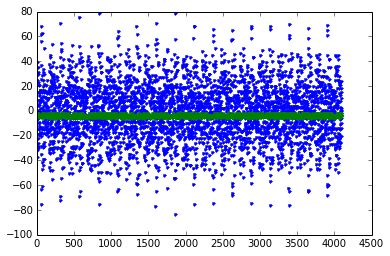

In [239]:
plot(x,'.')
plot(y,'.')

In [234]:
r2.boffile

'r2bb2xpfb14mcr21_2015_Oct_08_1422.bof'

In [235]:
[x for x in r2.r.listbof() if x.startswith('r2bb2')]

['r2bb2xpfb14mcr21_2015_Oct_07_1708.bof',
 'r2bb2xpfb14mcr21_2015_Oct_08_2247.bof',
 'r2bb2xpfb14mcr22_2015_Oct_08_1458.bof',
 'r2bb2xpfb14mcr22_2015_Oct_08_1706.bof',
 'r2bb2xpfb14mcr21_2015_Oct_08_1422.bof']

In [43]:
r2.select_fft_bins(range(r2.fft_bins.shape[1]))

In [44]:
r2.readout_selection

array([ 0,  1,  2,  3,  4, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5])

In [45]:
d,addr = r2.get_data_katcp(128)

read 128 in 3.5 seconds, 151878.04 samples per second, idle 3.02 per read
address skip!


In [40]:
addr.shape

(128,)

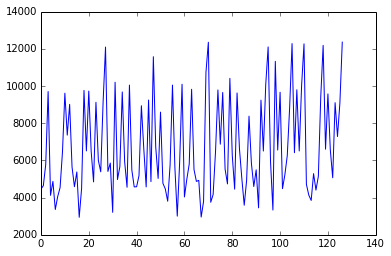

In [46]:

plot(np.diff(addr))

In [8]:
import kid_readout.utils.r2sweeps
reload(kid_readout.utils.r2sweeps)

<module 'kid_readout.utils.r2sweeps' from '/home/gjones/kid_readout/kid_readout/utils/r2sweeps.pyc'>

In [243]:
cf = np.load('/data/readout/resonances/current.npy')[:16]

In [244]:
cf.shape

(16,)

In [272]:
fs = 512.
nsamp=2**17
df = fs/nsamp
offset_bins = np.arange(-20,20)
offsets = offset_bins*df

In [273]:
swp = kid_readout.utils.r2sweeps.do_sweep(r2,center_freqs=cf*0.999427,offsets=offsets,nsamp=nsamp,nchan_per_step=4)

read 2 in 0.1 seconds, 62526.71 samples per second, idle 26.00 per read
read 2 in 0.1 seconds, 61242.61 samples per second, idle 14.50 per read
read 2 in 0.1 seconds, 62492.82 samples per second, idle 30.00 per read
read 2 in 0.1 seconds, 62694.19 samples per second, idle 22.50 per read
read 2 in 0.1 seconds, 62495.32 samples per second, idle 32.50 per read
read 2 in 0.1 seconds, 62373.93 samples per second, idle 29.50 per read
read 2 in 0.1 seconds, 62335.91 samples per second, idle 14.50 per read
read 2 in 0.1 seconds, 63615.24 samples per second, idle 22.50 per read
read 2 in 0.1 seconds, 61981.69 samples per second, idle 32.00 per read
read 2 in 0.1 seconds, 61863.85 samples per second, idle 13.50 per read
read 2 in 0.1 seconds, 61994.00 samples per second, idle 31.00 per read
read 2 in 0.1 seconds, 62442.39 samples per second, idle 23.00 per read
read 2 in 0.1 seconds, 62923.47 samples per second, idle 25.50 per read
read 2 in 0.1 seconds, 62600.75 samples per second, idle 25.00 p

(77, 78)

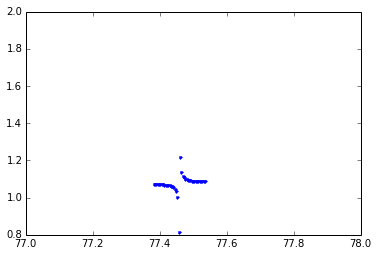

In [274]:
plot(swp.freqs,np.angle(swp.data*np.exp(-2j*200.08*swp.freqs)),'.')
xlim(77,78)

(77, 78)

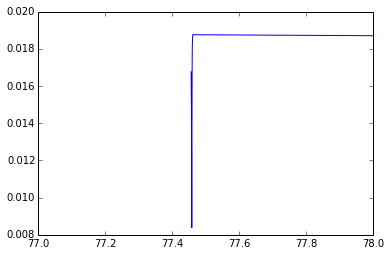

In [261]:
plot(swp.freqs,np.abs(swp.data*np.exp(-2j*31.3*swp.freqs)))
xlim(77,78)

In [56]:
from kid_readout.utils import acquire
from kid_readout.analysis.khalil import delayed_generic_guess,delayed_generic_s21

In [275]:
coarse_res = acquire.fit_sweep_data(swp,delay_estimate=-200.1e-6,model=delayed_generic_s21,guess=delayed_generic_guess)

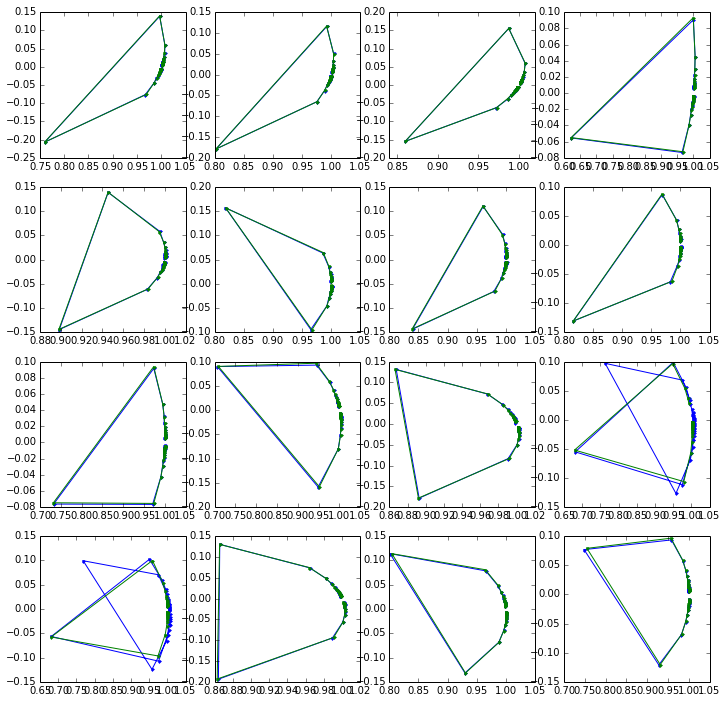

In [276]:
fig,axs = subplots(4,4,figsize=(12,12))
for k in range(16):
    ax= axs.flatten()[k]
    res = coarse_res[k]
    s21c = res.normalize(res.freq_data,res.s21_data)
    ax.plot(s21c.real,s21c.imag,'.-')
    model=res.normalized_model(res.freq_data)
    ax.plot(model.real,model.imag,'.-')

In [277]:
new_cf = np.array([res.f_0 for res in coarse_res])

In [278]:
new_cf

array([  77.45808606,   84.62213639,   86.24380314,   92.22688711,
        103.41971437,  109.26084801,  111.57536919,  116.05938307,
        119.53167362,  133.81942115,  134.40022105,  134.56642722,
        134.56657325,  134.9624972 ,  141.63550946,  149.92121601])

In [279]:
fs = 512.
nsamp=2**21
df = fs/nsamp
offset_bins = np.hstack(([-16,-12,-8,-6],np.arange(-4,5),[6,8,12,16,]))
offsets = offset_bins*df

In [280]:

fine_swp = kid_readout.utils.r2sweeps.do_sweep(r2,center_freqs=new_cf,offsets=offsets,nsamp=nsamp,nchan_per_step=4)

read 2 in 0.1 seconds, 62375.29 samples per second, idle 32.00 per read
read 2 in 0.1 seconds, 62149.08 samples per second, idle 12.50 per read
read 2 in 0.1 seconds, 62659.20 samples per second, idle 27.50 per read
read 2 in 0.1 seconds, 62617.52 samples per second, idle 23.50 per read
read 2 in 0.1 seconds, 61139.41 samples per second, idle 17.00 per read
read 2 in 0.1 seconds, 61422.16 samples per second, idle 13.00 per read
read 2 in 0.1 seconds, 62644.81 samples per second, idle 28.00 per read
read 2 in 0.1 seconds, 61258.66 samples per second, idle 15.50 per read
read 2 in 0.1 seconds, 62474.75 samples per second, idle 27.00 per read
read 2 in 0.1 seconds, 62635.79 samples per second, idle 15.50 per read
read 2 in 0.1 seconds, 62808.68 samples per second, idle 18.00 per read
read 2 in 0.1 seconds, 62567.24 samples per second, idle 16.50 per read
read 2 in 0.1 seconds, 61402.84 samples per second, idle 9.00 per read
read 2 in 0.1 seconds, 62689.38 samples per second, idle 25.50 pe

In [281]:
fine_res = acquire.fit_sweep_data(fine_swp,delay_estimate=-200.1e-6,model=delayed_generic_s21,guess=delayed_generic_guess)

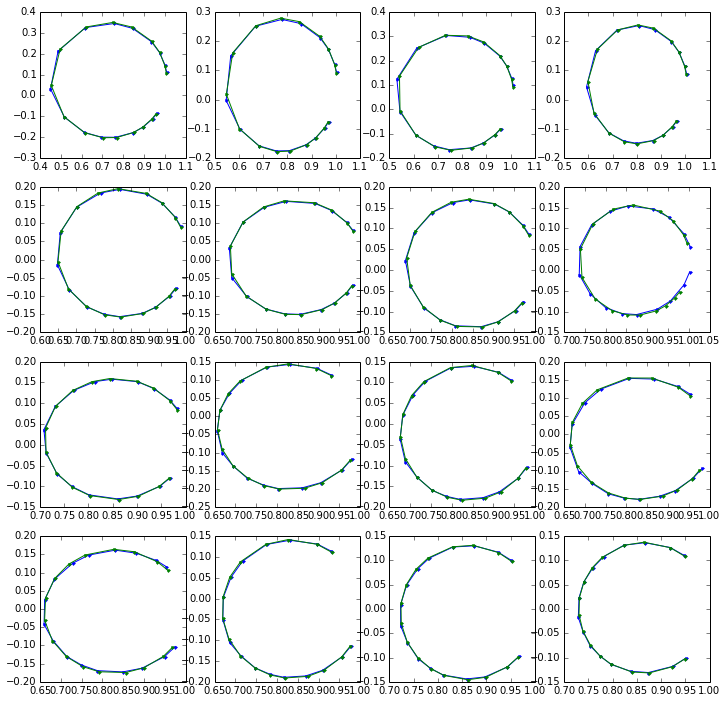

In [282]:
fig,axs = subplots(4,4,figsize=(12,12))
for k in range(16):
    ax= axs.flatten()[k]
    res = fine_res[k]
    s21c = res.normalize(res.freq_data,res.s21_data)
    ax.plot(s21c.real,s21c.imag,'.-')
    model=res.normalized_model(res.freq_data)
    ax.plot(model.real,model.imag,'.-')

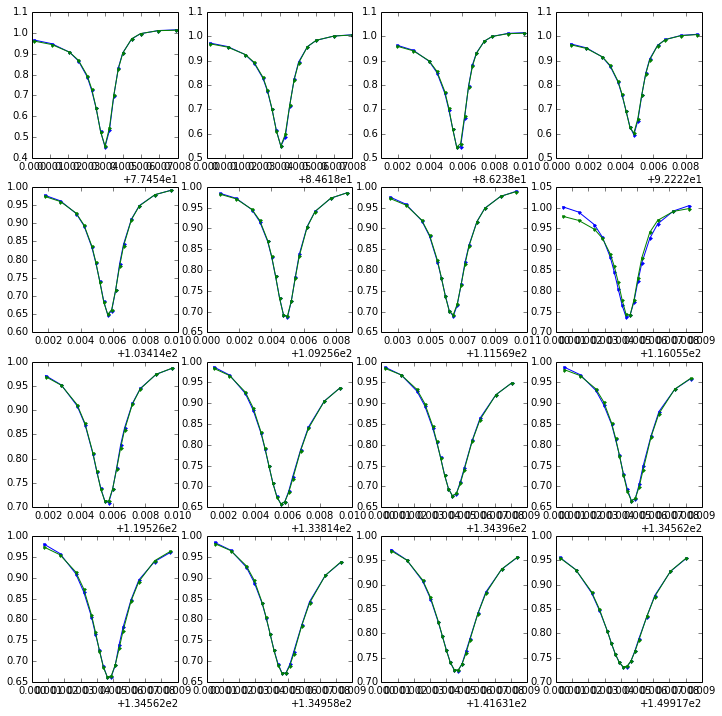

In [283]:
fig,axs = subplots(4,4,figsize=(12,12))
for k in range(16):
    ax= axs.flatten()[k]
    res = fine_res[k]
    s21c = res.normalize(res.freq_data,res.s21_data)
    ax.plot(res.freq_data,np.abs(s21c),'.-')
    model=res.normalized_model(res.freq_data)
    ax.plot(res.freq_data,np.abs(model),'.-')

In [284]:
(new_cf-np.array([res.f_0 for res in fine_res]))*1e6

array([ -54.11041572,  -69.97572262,  -96.38262215,   -6.35521282,
        -87.52550123,  -56.83364573,  -77.58735256, -175.82872538,
        -13.44801736,  -63.70423984, -112.60884318, -249.6394892 ,
       -148.66503054, -138.4394854 ,  -82.06780947,  -46.71617756])

In [67]:
fr,s21,err = fine_swp.select_index(0)

In [285]:
fine_f0 = np.array([res.f_0 for res in fine_res])

In [286]:
fine_f0

array([  77.45814017,   84.62220637,   86.24389953,   92.22689346,
        103.4198019 ,  109.26090485,  111.57544678,  116.0595589 ,
        119.53168707,  133.81948485,  134.40033366,  134.56667686,
        134.56672191,  134.96263564,  141.63559153,  149.92126273])

In [381]:
np.save('/data/readout/resonances/2015-10-19-0813f12-120mK.npy',fine_f0)

In [288]:
r2.set_tone_freqs(fine_f0,nsamp=2**21)

array([  77.45825195,   84.62231445,   86.24389648,   92.22680664,
        103.41992188,  109.26098633,  111.57543945,  116.05957031,
        119.53173828,  133.81958008,  134.40039062,  134.56665039,
        134.56665039,  134.96264648,  141.63549805,  149.92114258])

In [289]:
r2.select_fft_bins(range(4))

In [374]:
d,addr = r2.get_data_katcp(128)

read 128 in 8.4 seconds, 62496.73 samples per second, idle 18.28 per read


In [375]:
d.shape

(131072, 4)

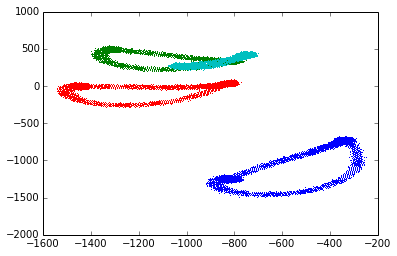

In [376]:
plot(d.real,d.imag,',')

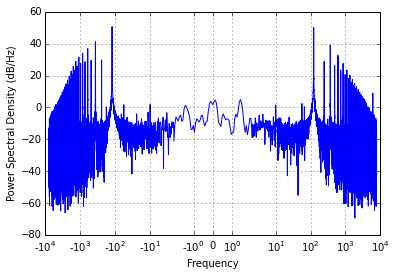

In [377]:
blah = psd(d[:,2]-d[:,2].mean(),NFFT=2**18,Fs=256e6/2**14)
xscale('symlog')

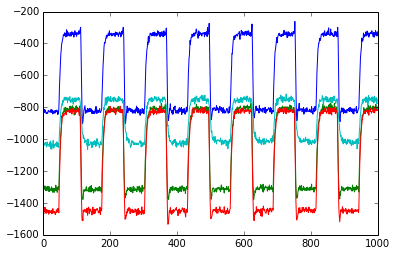

In [378]:
plot(d[:1000,:].real)

In [379]:
df = d.reshape((-1,128,4))

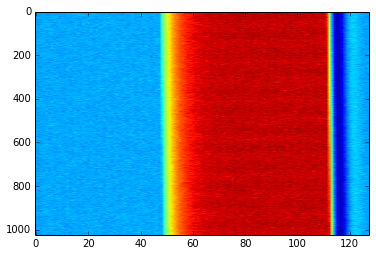

In [380]:
imshow(df[:,:,0].imag,aspect='auto')

In [305]:
[res.Q_i for res in fine_res]

[113888.52997328318,
 101417.21417159586,
 101518.62411816315,
 92094.306680369511,
 79311.117285531596,
 80254.783654486921,
 72697.640244873663,
 85834.943738045171,
 69007.659864244022,
 65739.240504881964,
 68294.633552158193,
 76477.747333577398,
 74958.344766319482,
 64920.477656385643,
 59945.275613605263,
 54698.492710917068]

In [181]:
blk = fine_swp.blocks[110]

In [182]:
blk.data.shape

(2048,)

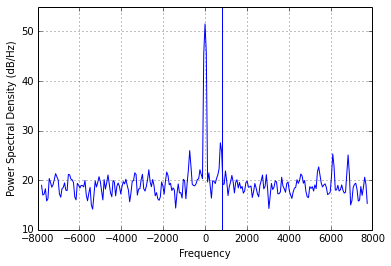

In [183]:
blah = psd(blk.data,Fs=256e6/2**14)
ax = gca()
ax.axvline(800)

In [194]:
x,y = r2.get_raw_adc()

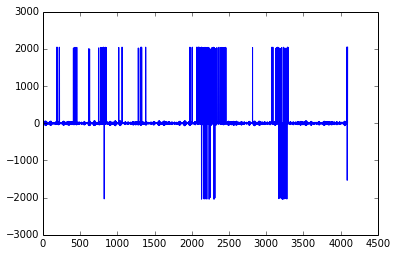

In [197]:
plot(x)

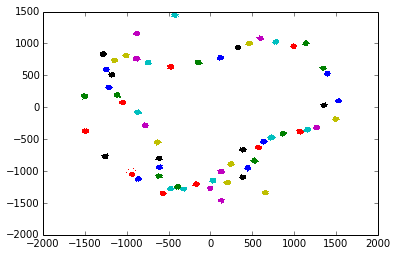

In [306]:
for blk in fine_swp.blocks[:60]:
    plot(blk.data.real,blk.data.imag,',')

In [192]:
blk.tone*512./blk.nsamp

92.226318359375

In [126]:
1e6/(2*np.pi*1e3)

159.15494309189535

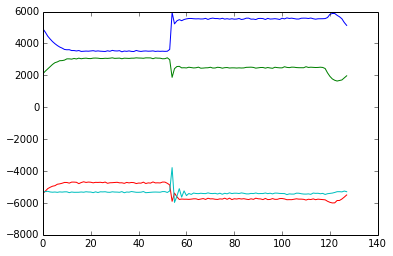

In [124]:
plot(df.mean(0).real)

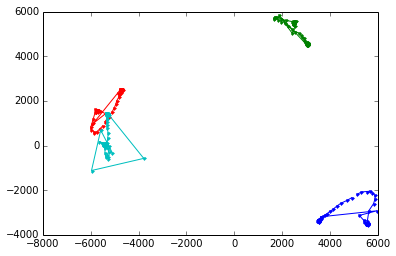

In [118]:
plot(df.mean(0).real,df.mean(0).imag,'.-')

In [68]:
200e-6*256e6

51200.0

In [69]:
s21c = s21*np.exp(-2j*200.1*fr)

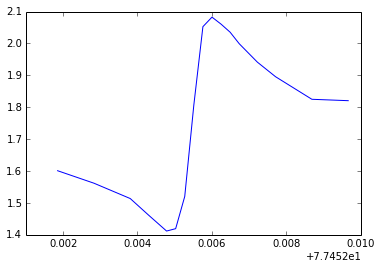

In [70]:
plot(fr,np.angle(s21c))

In [23]:
77.46/cf[0]

0.99942694876707272

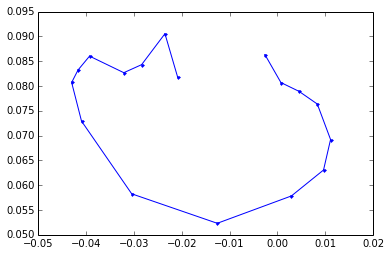

In [71]:
plot(s21c.real,s21c.imag,'.-')

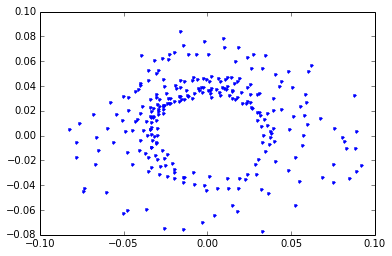

In [72]:
plot(fine_swp.data.real,fine_swp.data.imag,'.')